# 1.. Lets Prepare data for Analysis

In [1]:
### lets import all the necessary packages !

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## read data 
uber_15=pd.read_csv(r'F:\Data Analysis_projects\Uber\Datasets/uber-raw-data-janjune-15.csv',encoding='utf-8')

In [3]:
## view of data
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65


In [4]:
## getting dimensions of data
uber_15.shape

(14270479, 4)

In [5]:
## getting count of total duplicated observations in your data
uber_15.duplicated().sum()

898225

In [6]:
## deleting all the duplicated observations
uber_15.drop_duplicates(inplace=True)

In [7]:
uber_15.shape

(13372254, 4)

# 2..Which month have max. Uber pickups in New York City ?

In [8]:
### what about data-type of your features
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [9]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'], format ='%Y-%m-%d %H:%M:%S' )

In [10]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [11]:
## extracting month from 'Pickup_date'..
uber_15['month']=uber_15['Pickup_date'].dt.month

<AxesSubplot:>

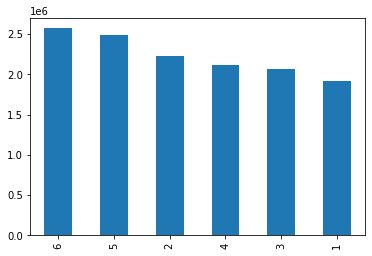

In [12]:
uber_15['month'].value_counts().plot(kind='bar')

# 3.. Lets Find out Total trips for each month & each weekdays.. 

In [13]:
## extracting dervied features (weekday ,day ,hour ,month ,minute) from 'Pickup_date'..

uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.hour
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['minute']=uber_15['Pickup_date'].dt.minute

In [14]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47


In [15]:
temp=uber_15.groupby(['month','weekday'],as_index=False).size()
temp.head()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


In [16]:
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [17]:
dict_month={1:'Jan', 2:'Feb', 3:'March', 4:'april', 5:'May', 6:'June'}

In [18]:
temp['month']=temp['month'].map(dict_month)

In [19]:
temp['month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
5       Jan
6       Jan
7       Feb
8       Feb
9       Feb
10      Feb
11      Feb
12      Feb
13      Feb
14    March
15    March
16    March
17    March
18    March
19    March
20    March
21    april
22    april
23    april
24    april
25    april
26    april
27    april
28      May
29      May
30      May
31      May
32      May
33      May
34      May
35     June
36     June
37     June
38     June
39     June
40     June
41     June
Name: month, dtype: object

In [20]:
type(uber_15.groupby(['month','weekday']).size())

pandas.core.series.Series

In [21]:
temp

,month,weekday,size
0,Jan,Friday,339285
1,Jan,Monday,190606
2,Jan,Saturday,386049
3,Jan,Sunday,230487
4,Jan,Thursday,330319
5,Jan,Tuesday,196574
6,Jan,Wednesday,245650
7,Feb,Friday,373550
8,Feb,Monday,274948
9,Feb,Saturday,368311


<AxesSubplot:xlabel='month', ylabel='size'>

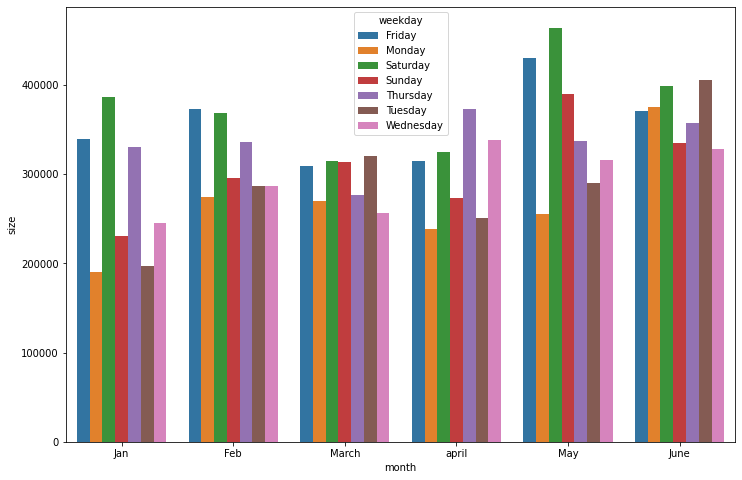

In [22]:
## create grouped bar chart ..

plt.figure(figsize=(12,8))
sns.barplot(x='month',y='size',hue='weekday',data=temp)

# 4.. Lets Find out Hourly Rush in New york city on all days

In [23]:
summary=uber_15.groupby(['weekday','hour'],as_index=False).size()

In [24]:
summary

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
...,...,...,...
163,Wednesday,19,131317
164,Wednesday,20,123490
165,Wednesday,21,120941
166,Wednesday,22,115208


<AxesSubplot:xlabel='hour', ylabel='size'>

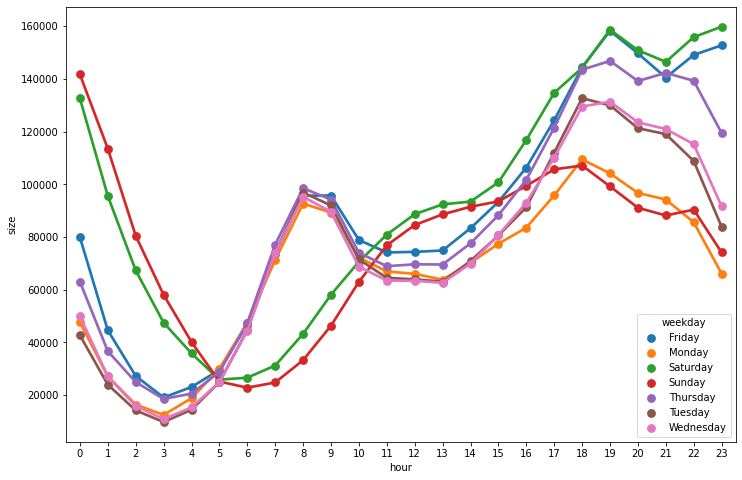

In [25]:
## pointplot between 'hour' & 'size' for all the weekdays..

plt.figure(figsize=(12,8))
sns.pointplot(x='hour',y='size',hue='weekday',data=summary)

In [26]:
'''
It's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon, 
but it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,
but Sunday pickups takes a downward turn after evening..

We can see that there the weekdays that has the most demand during the late evening is Friday and Saturday, 
which is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.

It seems like New Yorkers are starting their 'weekends' on Thursday nights. :)


'''

"\nIt's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon, \nbut it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,\nbut Sunday pickups takes a downward turn after evening..\n\nWe can see that there the weekdays that has the most demand during the late evening is Friday and Saturday, \nwhich is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.\n\nIt seems like New Yorkers are starting their 'weekends' on Thursday nights. :)\n\n\n"

# 5.. Which Base_number has most number of Active Vehicles ??

In [27]:
uber_15.head(2)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47


In [28]:
## lets read  "Uber-Jan-Feb-FOIL.csv"..
uber_foil=pd.read_csv(r'F:\Data Analysis_projects\Uber\Datasets/Uber-Jan-Feb-FOIL.csv')

In [29]:
uber_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [30]:
##!pip install chart_studio
##!pip install plotly

In [31]:
### establishing the entire set-up of Plotly..

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs ,plot ,iplot ,init_notebook_mode
init_notebook_mode(connected=True)

In [32]:
px.box(x='dispatching_base_number',y='active_vehicles' ,data_frame=uber_foil)

In [33]:
### if u need distribution +  5-summary stats of data , its good to go with violinplot

px.violin(x='dispatching_base_number',y='active_vehicles' ,data_frame=uber_foil)

# 6.. Collect entire data & Make it ready for the Data Analysis..

In [34]:
import os

In [35]:
files=os.listdir(r'F:\Data Analysis_projects\Uber\Datasets')[-7:]

In [36]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [37]:
files.remove('uber-raw-data-janjune-15.csv')

In [38]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [39]:
path=r'F:\Data Analysis_projects\Uber\Datasets'

#blank dataframe
final=pd.DataFrame()

for file in files:
    current_df=pd.read_csv(path+'/'+file,encoding='utf-8')
    final=pd.concat([current_df,final])

In [40]:
### After Collecting entire data ,u might ask is : Do we have duplicate entires in data ?
### We are going to remove duplicates data when the entire rows is duplicated

In [41]:
final.shape

(4534327, 4)

In [42]:
final.head(2)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512


In [43]:
### first lets figure out total observations where we have duplicate values..
final.duplicated().sum()

82581

In [44]:
## drop duplicate values ..
### By default, it removes duplicate rows based on all columns.
### To remove duplicates on specific column(s), use subset parameter of 'drop_duplicates()'

### by-default , keep='first which says it will keep first occurence of duplicates...'

final.drop_duplicates(inplace=True)

In [45]:
final.shape

(4451746, 4)

## Dataset Information : 

### The dataset contains information about the Datetime, Latitude, Longitude and Base of each uber ride that happened in the month of July 2014 at New York City, USA

##### Date/Time : The date and time of the Uber pickup

##### Lat : The latitude of the Uber pickup

##### Lon : The longitude of the Uber pickup

##### Base : The TLC base company code affiliated with the Uber pickup

    The Base codes are for the following Uber bases:
    B02512 : Unter
    B02598 : Hinter
    B02617 : Weiter
    B02682 : Schmecken
    B02764 : Danach-NY

    ->> The globe is split into an imaginary 360 sections from both top to bottom (north to south) and 180 sections from side to side (west to east). The sections running from top to bottom on a globe are called longitude, and the sections running from side to side on a globe are called latitude.

    ->> Latitude is the measurement of distance north or south of the Equator.

    ->> Every location on earth has a global address. Because the address is in numbers, people can communicate about location no matter what language they might speak. A global address is given as two numbers called coordinates. The two numbers are a location's latitude number and its longitude number ("Lat/Long").

# 7.. at what locations of New York City we are getting rush ??

In [46]:
### ie where-ever we have more data-points or more density, it means more rush is at there !

In [47]:
rush_uber=final.groupby(['Lat','Lon'],as_index=False).size()

In [48]:
rush_uber

,Lat,Lon,size
0,39.6569,-74.2258,1
1,39.6686,-74.1607,1
2,39.7214,-74.2446,1
3,39.8416,-74.1512,1
4,39.9055,-74.0791,1
...,...,...,...
574553,41.3730,-72.9237,1
574554,41.3737,-73.7988,1
574555,41.5016,-72.8987,1
574556,41.5276,-72.7734,1


In [49]:
#!pip install folium

In [50]:
import folium

In [51]:
basemap=folium.Map()

In [52]:
from folium.plugins import HeatMap

In [53]:
HeatMap(rush_uber).add_to(basemap)

In [1]:
basemap

NameError: name 'basemap' is not defined

We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot.
& these are made from Midtown to Lower Manhattan.
Followed by Upper Manhattan and the Heights of Brooklyn.

# 8.. Examine rush on Hour and Weekday ( Perform Pair wise Analysis )

In [55]:
final.tail(35)

,Date/Time,Lat,Lon,Base
564481,4/30/2014 21:58:00,40.7537,-73.9820,B02764
564482,4/30/2014 22:04:00,40.7361,-73.9851,B02764
564483,4/30/2014 22:07:00,40.7459,-73.9843,B02764
564484,4/30/2014 22:14:00,40.7209,-74.0042,B02764
564485,4/30/2014 22:24:00,40.7583,-73.9901,B02764
564486,4/30/2014 22:25:00,40.7342,-74.0101,B02764
564487,4/30/2014 22:25:00,40.7412,-73.9792,B02764
564488,4/30/2014 22:25:00,40.7633,-73.9867,B02764
564489,4/30/2014 22:26:00,40.7549,-73.9845,B02764
564490,4/30/2014 22:27:00,40.7210,-73.9850,B02764


In [56]:
### converting 'Date/Time' feature into date-time..

final['Date/Time']=pd.to_datetime(final['Date/Time'],format ='%m/%d/%Y %H:%M:%S')

In [57]:
### extracting 'weekday' & 'hour' from 'Date/Time' feature..

final['weekday']=final['Date/Time'].dt.day
final['hour']=final['Date/Time'].dt.hour

In [58]:
final.head(3)

,Date/Time,Lat,Lon,Base,weekday,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0


In [59]:
pivot=final.groupby(['weekday','hour']).size().unstack()

In [60]:
type(final.groupby(['weekday','hour']).size())

pandas.core.series.Series

In [61]:
pivot

### pivot table is all about  , we have Rows*columns & having value in each cell !

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,...,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,...,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,...,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,...,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,...,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,...,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,...,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,...,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,...,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [62]:
### styling dataframe

pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


# 9.. How to Automate Your Analysis..?

In [63]:
## creating a user-defined function..

def gen_pivot_table(df,col1,col2):
    pivot=df.groupby([col1,col2]).size().unstack()
    return pivot.style.background_gradient()

In [64]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'weekday', 'hour'], dtype='object')

In [65]:
gen_pivot_table(final,'weekday','hour')

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


In [66]:
## gen_pivot_table(final,'weekday','hour')